In [ ]:
# Import required packages:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report
!pip install scikit-multilearn==0.2.0
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df= pd.read_csv("/content/All_Corpora_normalized-2023.csv") # read the dataframe

In [ ]:
df.head() # explore the top 5 rows of dataframe

,content,Anger,Anticipation,Disgust,Fear,Joy,Love,Optimism,Pessimism,Sadness,Surprise,Trust,Neutral
0,l2a ana msh gamed bs 3al a2al msh bad5ol abden...,1,0,1,0,0,0,0,0,0,0,0,0
1,fe ramadan msh baftar lama yekoun 3andi emteha...,0,1,0,0,0,0,0,0,1,0,0,0
2,ftark 3andi anhrda ashan anta sha2yan t3ala kol,0,0,0,0,1,1,0,0,0,0,0,0
3,da eli kont 3awza asafer feh aslun ashan 3ed m...,0,0,0,0,0,0,0,0,0,0,1,0
4,sa7ya mn el sa3a ashan 3andi tasleim el sa3a a...,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
df.info() #print inforamation about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10509 entries, 0 to 10508
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       10509 non-null  object
 1   Anger         10509 non-null  int64 
 2   Anticipation  10509 non-null  int64 
 3   Disgust       10509 non-null  int64 
 4   Fear          10509 non-null  int64 
 5   Joy           10509 non-null  int64 
 6   Love          10509 non-null  int64 
 7   Optimism      10509 non-null  int64 
 8   Pessimism     10509 non-null  int64 
 9   Sadness       10509 non-null  int64 
 10  Surprise      10509 non-null  int64 
 11  Trust         10509 non-null  int64 
 12  Neutral       10509 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.0+ MB


In [ ]:
df.columns = df.columns.str.strip() # Remove spaces from columns names

In [ ]:
print(string.punctuation) # the punctuations included in the string.punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
#remove punctuations
def remove_punctuations(tweet):
  sentence = tweet.translate(str.maketrans('', '', string.punctuation))
  return sentence
df['content'] = df['content'].apply(lambda x:remove_punctuations(x))

In [ ]:
#mask = (df['content'].str.split().str.len() >= 3) # filter tweets with length less than 3 words
#df = df.loc[mask]

In [ ]:
rowSums = df.iloc[:,1:].sum(axis=1) # filter rows with all zeros (No label)
df= df.loc[rowSums>0]

In [ ]:
#df.drop_duplicates(inplace= True) # drop duplicated rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10509 entries, 0 to 10508
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       10509 non-null  object
 1   Anger         10509 non-null  int64 
 2   Anticipation  10509 non-null  int64 
 3   Disgust       10509 non-null  int64 
 4   Fear          10509 non-null  int64 
 5   Joy           10509 non-null  int64 
 6   Love          10509 non-null  int64 
 7   Optimism      10509 non-null  int64 
 8   Pessimism     10509 non-null  int64 
 9   Sadness       10509 non-null  int64 
 10  Surprise      10509 non-null  int64 
 11  Trust         10509 non-null  int64 
 12  Neutral       10509 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


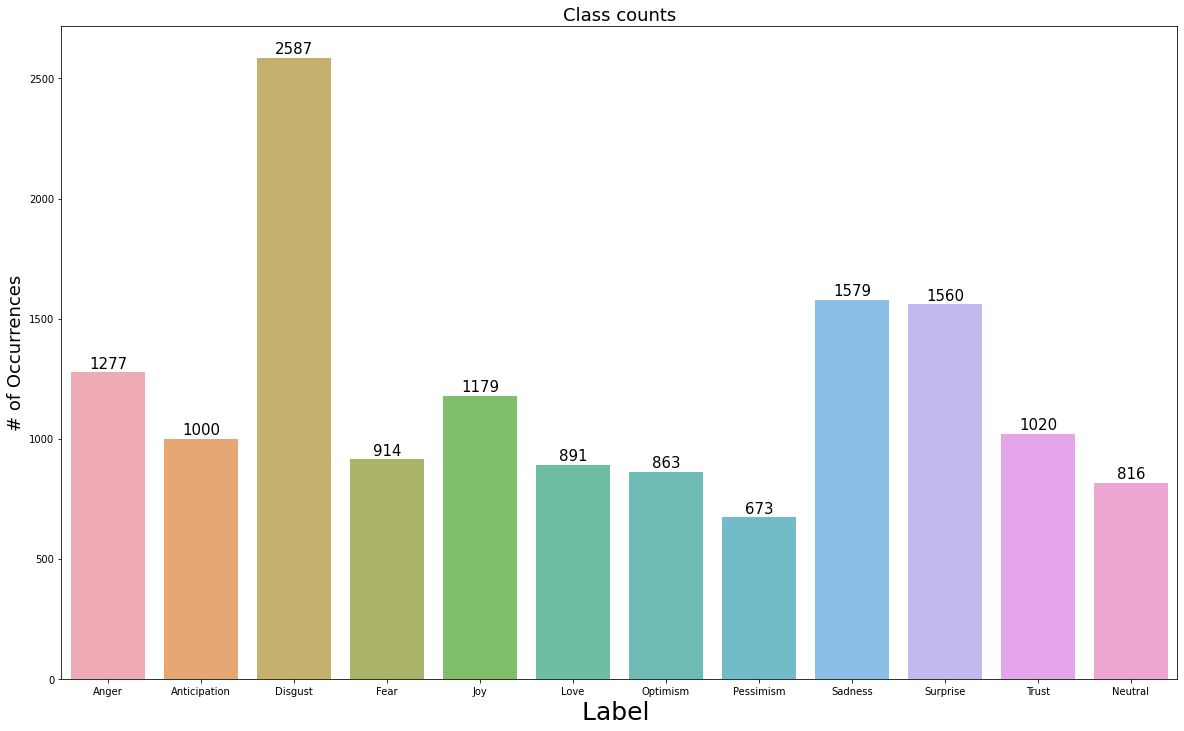

In [ ]:
# Exploratory data analysis
# plot the bar plot of labels frequency
y=df.iloc[:,1:].sum()
plt.figure(figsize=(20,12))
ax= sns.barplot(y.index, y.values, alpha=0.8)
plt.title("Class counts", fontsize=18)
plt.ylabel('# of Occurrences', fontsize=18)
plt.xlabel('Label ', fontsize=25)

rects = ax.patches
labels = y.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=15)

plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


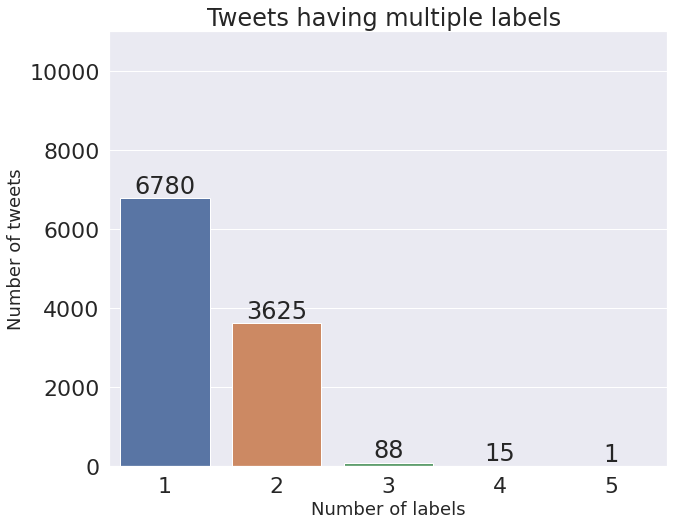

In [ ]:
# plot the bar plot of no of labels frequency
rowSums = df.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
sns.set(font_scale = 2)
plt.figure(figsize=(10,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
ax.set(ylim=(0, 11000))
plt.title("Tweets having multiple labels ")
plt.ylabel('Number of tweets', fontsize=18)
plt.xlabel('Number of labels', fontsize=18) #adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

<AxesSubplot:>

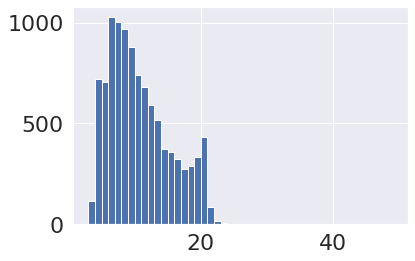

In [ ]:
#The distribution of the number of words in tweets
lens = df.content.str.split().str.len()
lens.hist(bins = range(3,50))

In [ ]:
# filter pure numbers in content column:
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if not word.isnumeric()]))

In [ ]:
X= df["content"] # Tweets is the feature column

In [ ]:
# Count the frequency of each word in the tweets and print the most common 5 words
count_vector = CountVectorizer(lowercase = True)
bag_of_words= count_vector.fit_transform(X)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vector.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

[('ana', 4105),
 ('el', 3103),
 ('msh', 2173),
 ('ashan', 1818),
 ('zehe2t', 1464),
 ('mn', 1344),
 ('ya', 1308),
 ('msd2', 1139),
 ('youm', 1121),
 ('bs', 1032),
 ('3andi', 835),
 ('bahebk', 725),
 ('aswad', 701),
 ('sure', 688),
 ('kan', 678),
 ('weskha', 675),
 ('walahi', 621),
 ('kda', 605),
 ('ma', 576),
 ('awi', 569)]

In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.20, shuffle=True)  # Split the data into train and test

In [ ]:
x_train, y_train= train["content"] , train.drop("content",axis = 1)

In [ ]:
x_test, y_test= test["content"] , test.drop("content",axis = 1)

**TfidfVectorizer with unigram :**

In [ ]:
# Unigram1
# Create a pipeline with tfidf with N-gram 1 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1,1),min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 1 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1, 1),min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 1 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1, 1),min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 1 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1, 1),min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 1 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1, 1),min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 1 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1, 1),min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.7778306374881065
Precision:  0.8859315589353612
Recall:  0.823321554770318
F1-score:  0.8534798534798534
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.7725975261655567
Precision:  0.8954597481877146
Recall:  0.8293286219081272
F1-score:  0.8611263988259034
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.6332064700285442
Precision:  0.7008833384099908
Recall:  0.8130742049469964
F1-score:  0.7528218550629805
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.7840152235965747
Precision:  0.9231707317073171
Recall:  0.8024734982332156
F1-score:  0.8586011342155009
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.7021883920076119
Precision:  0.9319910514541387
Recall:  0.7360424028268551
F1-score:  0.8225074037512339
*******************************************************************************
SVC
Accuracy:  0.7797335870599429
Precision:  0.9133200795228629
Recall:  0.811660777385159
F1-score:  0.8594948550046773
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**TfidfVectorizer with Bigram :**

In [ ]:
# Bigram
# Create a pipeline with tfidf with N-gram 2 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(ngram_range=(2, 2), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 2 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(2, 2), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 2 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(ngram_range=(2, 2), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 2 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(ngram_range=(2, 2), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 2 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(2, 2), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 2 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(2, 2), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.6141769743101808
Precision:  0.857207615593835
Recall:  0.6681978798586572
F1-score:  0.7509928514694201
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.577069457659372
Precision:  0.9362987369577156
Recall:  0.6024734982332155
F1-score:  0.7331756611481403
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.5447193149381542
Precision:  0.53366524419156
Recall:  0.7954063604240282
F1-score:  0.6387627695800228
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.6384395813510942
Precision:  0.8926713947990543
Recall:  0.6671378091872792
F1-score:  0.7635995955510616
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.5242626070409134
Precision:  0.9291569086651054
Recall:  0.5607773851590107
F1-score:  0.6994270603790216
*******************************************************************************
SVC
Accuracy:  0.6436726926736441
Precision:  0.8955152671755725
Recall:  0.6632508833922262
F1-score:  0.7620787657328462
*******************************************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Tfidf_Vectorizer with Trigram** 


In [ ]:
# Trigram 
# Create a pipeline with tfidf with N-gram 3 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 3 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 3 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 3 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 3 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-gram 3 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.29105417891642166
Precision:  0.8430851063829787
Recall:  0.303639846743295
F1-score:  0.44647887323943664
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.24653506929861402
Precision:  0.9170560747663551
Recall:  0.25063856960408687
F1-score:  0.3936810431293882
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.22847543049139019
Precision:  0.439622641509434
Recall:  0.3719667943805875
F1-score:  0.4029747492217226
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.2994540109197816
Precision:  0.8617305976806423
Recall:  0.30842911877394635
F1-score:  0.4542675758288267
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.19487610247795045
Precision:  0.8891928864569083
Recall:  0.20753512132822477
F1-score:  0.3365260160497023
*******************************************************************************
SVC
Accuracy:  0.29441411171776566
Precision:  0.8712962962962963
Recall:  0.3004469987228608
F1-score:  0.4468186134852802
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**N Char (3-10)**

In [ ]:
# Char 3
# Create a pipeline with tfidf with N-char 3 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 3 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 3 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 3 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
              ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 3 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 3 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(3, 3), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.7677446451070978
Precision:  0.8940350877192983
Recall:  0.8135376756066411
F1-score:  0.8518890003343365
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.750104997900042
Precision:  0.8952106589845157
Recall:  0.7937420178799489
F1-score:  0.8414283296666103
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.6522469550608988
Precision:  0.7813923227065712
Recall:  0.7669220945083014
F1-score:  0.7740895907186592
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.7795044099118018
Precision:  0.9283047050037341
Recall:  0.7937420178799489
F1-score:  0.8557659208261618
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.6921461570768584
Precision:  0.9262428687856561
Recall:  0.7257343550446999
F1-score:  0.8138202649480843
*******************************************************************************
SVC
Accuracy:  0.7782444351112978
Precision:  0.9166062364031907
Recall:  0.8071519795657727
F1-score:  0.8584040747028864
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Char 4
# Create a pipeline with tfidf with N-char 4 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(4, 4), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 4 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(4, 4), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 4 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(4, 4), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 4 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
              ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(4, 4), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 4 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(4, 4), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 4 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(4, 4), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.7807643847123058
Precision:  0.9036697247706422
Recall:  0.8176883780332056
F1-score:  0.8585316795172645
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.7916841663166737
Precision:  0.8998242530755711
Recall:  0.8173690932311622
F1-score:  0.8566170319558306
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.6421671566568669
Precision:  0.832779623477298
Recall:  0.7203065134099617
F1-score:  0.7724704673857216
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.7929441411171777
Precision:  0.9220968329086275
Recall:  0.8087484035759898
F1-score:  0.8617111753699609
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.6820663586728265
Precision:  0.9317134478424801
Recall:  0.7100893997445722
F1-score:  0.8059431056350789
*******************************************************************************
SVC
Accuracy:  0.8009239815203696
Precision:  0.9233827249728949
Recall:  0.815772669220945
F1-score:  0.8662485166977454
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Char 5
# Create a pipeline with tfidf with N-char 5 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(5, 5), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 5 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(5, 5), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 5 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(5, 5), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 5 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
              ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(5, 5), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 5 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(5, 5), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 5 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(5, 5), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.7975640487190256
Precision:  0.9076220583069898
Recall:  0.8250319284802043
F1-score:  0.8643585883927078
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.7942041159176817
Precision:  0.9013986013986014
Recall:  0.8231162196679438
F1-score:  0.8604806408544727
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.7194456110877783
Precision:  0.8167487684729065
Recall:  0.7940613026819924
F1-score:  0.805245264691598
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.8009239815203696
Precision:  0.9148174659985684
Recall:  0.8160919540229885
F1-score:  0.8626392170097874
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.6694666106677867
Precision:  0.926284751474305
Recall:  0.7021072796934866
F1-score:  0.7987649836541953
*******************************************************************************
SVC
Accuracy:  0.8000839983200336
Precision:  0.9193259232699893
Recall:  0.8186462324393359
F1-score:  0.8660699206215168
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Char 6
# Create a pipeline with tfidf with N-char 6 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(6, 6), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 6 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(6, 6), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 6 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(6, 6), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 6 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
              ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(6, 6), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 6 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(6, 6), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 6 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(6, 6), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.7879042419151617
Precision:  0.898186889818689
Recall:  0.822477650063857
F1-score:  0.8586666666666667
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.7736245275094498
Precision:  0.9258443465491923
Recall:  0.8052362707535121
F1-score:  0.8613387978142076
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.7614447711045779
Precision:  0.799396681749623
Recall:  0.8461047254150702
F1-score:  0.8220877927718319
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.7937841243175137
Precision:  0.9022316684378321
Recall:  0.8132183908045977
F1-score:  0.8554156171284635
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.6812263754724905
Precision:  0.9240610813041684
Recall:  0.7148786717752235
F1-score:  0.806120612061206
*******************************************************************************
SVC
Accuracy:  0.7984040319193616
Precision:  0.917680744452398
Recall:  0.8186462324393359
F1-score:  0.8653391832602093
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Char 7
# Create a pipeline with tfidf with N-char 7 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(7, 7), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 7 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(7, 7), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 7 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(7, 7), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 7 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
              ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(7, 7), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 7 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(7, 7), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 7 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(7, 7), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.7795044099118018
Precision:  0.9060378706680957
Recall:  0.80970625798212
F1-score:  0.8551677626032709
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.7849643007139857
Precision:  0.9072609633357297
Recall:  0.8058748403575989
F1-score:  0.853567805207981
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.751784964300714
Precision:  0.7445934848070079
Recall:  0.8684546615581098
F1-score:  0.8017686072218128
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.7895842083158336
Precision:  0.9149855907780979
Recall:  0.8109833971902938
F1-score:  0.8598510494245092
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.6686266274674506
Precision:  0.9237894736842105
Recall:  0.7005108556832694
F1-score:  0.7968040675503903
*******************************************************************************
SVC
Accuracy:  0.7862242755144897
Precision:  0.915728296403923
Recall:  0.8049169859514687
F1-score:  0.8567544604927781
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Char 8
# Create a pipeline with tfidf with N-char 8 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(8, 8), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 8 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(8, 8), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 8 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(8, 8), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 8 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
              ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(8, 8), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 8 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(8, 8), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 8 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(8, 8), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.7417051658966821
Precision:  0.8937339684866251
Recall:  0.7787356321839081
F1-score:  0.8322811806858896
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.7383452330953381
Precision:  0.9170204554226168
Recall:  0.7586206896551724
F1-score:  0.8303337410449065
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.7202855942881142
Precision:  0.6742871189773845
Recall:  0.8757982120051085
F1-score:  0.7619444444444444
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.75052498950021
Precision:  0.9100074682598954
Recall:  0.7780970625798213
F1-score:  0.8388984509466437
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.619907601847963
Precision:  0.9226943942133815
Recall:  0.6516602809706258
F1-score:  0.7638473053892214
*******************************************************************************
SVC
Accuracy:  0.7568248635027299
Precision:  0.9094311377245509
Recall:  0.7758620689655172
F1-score:  0.8373535492763612
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Char 9
# Create a pipeline with tfidf with N-char 9 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(9, 9), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 9 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(9, 9), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 9 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(9, 9), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 9 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
              ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(9, 9), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 9 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(9, 9), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 9 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(9, 9), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.6845863082738345
Precision:  0.8773621288083301
Recall:  0.7263729246487867
F1-score:  0.7947598253275109
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.6719865602687947
Precision:  0.9204301075268817
Recall:  0.6832694763729247
F1-score:  0.7843137254901961
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.6619067618647627
Precision:  0.5879669852302346
Recall:  0.8643039591315453
F1-score:  0.6998448810754913
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.6984460310793784
Precision:  0.9011119936457506
Recall:  0.7244572158365262
F1-score:  0.8031858407079646
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.5787484250314994
Precision:  0.9237864077669903
Recall:  0.6075989782886334
F1-score:  0.733050847457627
*******************************************************************************
SVC
Accuracy:  0.7097858042839144
Precision:  0.9028436018957346
Recall:  0.7298850574712644
F1-score:  0.8072033898305087
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Char 10
# Create a pipeline with tfidf with N-char 10 and Bagging classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(10, 10), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(BaggingClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("Bagging")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 10 and AdaBoost classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(10, 10), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(random_state=1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("AdaBoost")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 10 and NB classifier using OneVsRestClassifier
pipeline = Pipeline([
               ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(10, 10), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("NB")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 10 and RF classifier using OneVsRestClassifier
pipeline = Pipeline([
              ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(10, 10), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("RF")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 10 and LR classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(10, 10), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("LR")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

# Create a pipeline with tfidf with N-char 10 and SVC classifier using OneVsRestClassifier
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char',ngram_range=(10, 10), min_df= 2, max_df= 0.5)),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
pipeline.fit(x_train, y_train) # fit the classifier with the training data
predictions = pipeline.predict(x_test) # predict the labels of test dataset

# pipeline evaluation:

report = classification_report(y_test, predictions, output_dict=True)
print("SVC")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", report['micro avg']['precision'])
print("Recall: ", report['micro avg']['recall'])
print("F1-score: ", report['micro avg']['f1-score'])
print("*******************************************************************************")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging
Accuracy:  0.6484670306593868
Precision:  0.8847262247838616
Recall:  0.6861430395913155
F1-score:  0.7728825750764251
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Accuracy:  0.5816883662326754
Precision:  0.8968325791855204
Recall:  0.6328224776500638
F1-score:  0.742044178210408
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Accuracy:  0.6119277614447711
Precision:  0.5160142348754448
Recall:  0.8333333333333334
F1-score:  0.6373626373626374
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
Accuracy:  0.6661066778664426
Precision:  0.9012965286491008
Recall:  0.688058748403576
F1-score:  0.7803729856961797
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy:  0.5207895842083158
Precision:  0.9216931216931217
Recall:  0.5561941251596424
F1-score:  0.6937475109518121
*******************************************************************************
SVC
Accuracy:  0.6778664426711466
Precision:  0.894672131147541
Recall:  0.6969987228607918
F1-score:  0.7835606604450825
*******************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
